In [55]:
from cells import layer_v_with_ais_test 
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(layer_v_with_ais_test )
cellbuilder = layer_v_with_ais_test.SPI6


## Calculate the Ih Sag

The input resistance si calculated by measuring the differences of the maximum voltage in the simutlation window to baseline of a 0 amp stimulus of a stimuli ranging from `i*0.1 in range(0,10)` 

In [137]:
from helpers import generic
reload(generic)

def calculateIhSag(cellbuilder):
    baselineparams = {"dur":500, "delay":100, "amp": 0}
    baseline = generic.stimulate(cellbuilder,baselineparams)
    
    
    params = [{"dur":500, "delay":100, "amp": 0 - i*0.025} for i in range(1,10)]
    traces = []
    
    for param in params:
        traces.append(generic.stimulate(cellbuilder,param))
        
    return [baseline, traces]
                       

In [138]:
baseline, traces = calculateIhSag(cellbuilder)

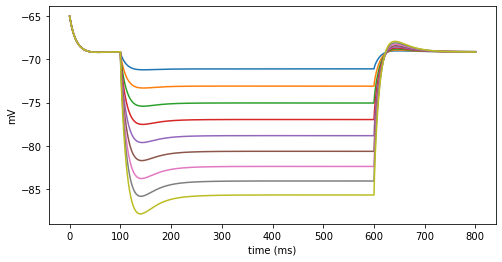

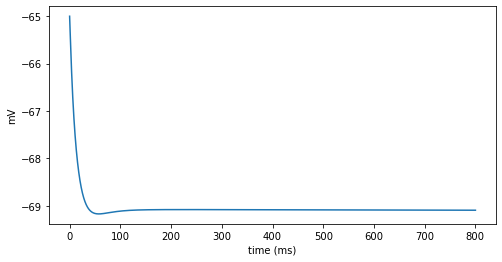

In [139]:
plotTraces(traces)
plotTrace(baseline)

In [140]:
from helpers import generic
reload(generic)

def calculateStableAndMinVoltage(baseline,traces,startoffset=200, endoffset=100):
    results = []
    baseline = baseline
    baselineamp = baseline["params"]["amp"]
    baselinedelay = baseline["params"]["delay"]
    baselinedur = baseline["params"]["dur"]
    
    baselinestablebegin = generic.timetoframe(baseline["t"], baselinedelay + startoffset)
    baselinestableend = generic.timetoframe(baseline["t"], baselinedelay + baselinedur - endoffset)
    
    baselineminvoltage  = baseline["v"].min()
    baselinestablevoltage = baseline["v"][baselinestablebegin:baselinestableend].mean()
    
    
    for trace in traces[1:]:
        amp = trace["params"]["amp"]
        delay = trace["params"]["delay"]
        dur = trace["params"]["dur"]
    
        stablebegin = generic.timetoframe(trace["t"], delay + startoffset)
        stableend = generic.timetoframe(trace["t"], delay + dur - endoffset)
        minvoltage = trace["v"].min()
        
        stablevoltage = trace["v"][stablebegin:stableend].mean()
        
        results.append({"amp": amp,
                        "min": minvoltage,
                        "stable": stablevoltage,
                        "mintobase": minvoltage- baselineminvoltage,
                        "stabletobase": stablevoltage - baselinestablevoltage
                       })
        
    return results
        

results= calculateStableAndMinVoltage(baseline,traces)

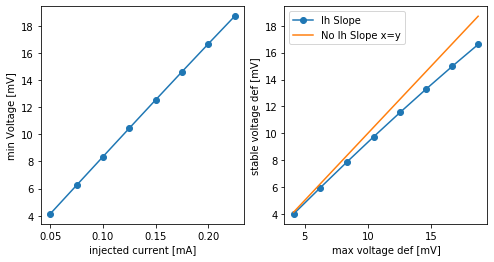

In [141]:
ystable = [ -el["stabletobase"] for el in results]
xmin = [ -el["mintobase"] for el in results]

ymin = [ -el["mintobase"] for el in results]
xamp = [ -el["amp"] for el in results]


# This will plot a function with slope 1
minmin = np.array(xmin).max()
maxmin= np.array(xmin).min()
x = np.linspace(minmin, maxmin, 100)


from matplotlib import pyplot
fig = pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)


ax2 = pyplot.subplot(121) # Default figsize is (8,6)
ax2.plot(xamp, ymin, marker="o")
ax2.plot(grund)
ax2.set_xlabel('injected current [mA]')
ax2.set_ylabel('min Voltage [mV]')

ax = pyplot.subplot(122)
ax.plot(xmin, ystable, marker="o", label="Ih Slope")
ax.plot(x,x, label="No Ih Slope x=y")
ax.set_xlabel('max voltage def [mV]')
ax.set_ylabel('stable voltage def [mV]')
ax.legend()

pyplot.show()